# Assignment Week 8 - – High Frequency Words

### Betsy Rosalen and Mikhail Groysman

## Project Overview

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## 1. Choosing a corpus of interest.

We went an easy way, selecting one of the corpus from freely available library Gutenburg. Our corpus is Austen Persuasion.

In [24]:
import nltk

In [25]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [26]:
austen = nltk.Text(nltk.corpus.gutenberg.words('austen-persuasion.txt'))


## 2. Total Unique Words.

All words:

In [30]:
AW=len(austen)
AW

98171

Unique words:

In [19]:
len(set(austen))

6132

Let's see distribution of our words:

In [27]:
nltk.FreqDist(austen)

FreqDist({',': 6750, 'the': 3120, 'to': 2775, '.': 2741, 'and': 2739, 'of': 2564, 'a': 1529, 'in': 1346, 'was': 1330, ';': 1290, ...})

Excluding punctuation and numbers. This code comes from the book.

In [28]:
len(set(word.lower() for word in austen if word.isalpha()))

5739

__Answer: 5,739__

## 3. How many unique words represent half of all words.

All words excluding numbers and punctuation.

In [58]:
AWwoNP=[word.lower() for word in austen if word.isalpha()]
tw=len(AWwoNP)

Getting frequency distributions of words:

In [62]:
fdist = nltk.FreqDist(AWwoNP).most_common()
fdist[:5]

[('the', 3329), ('to', 2808), ('and', 2801), ('of', 2570), ('a', 1595)]

tcount=0
wcount=0
for word, count in fdist:
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(tw/2):
        print(wcount)
        break

__Answer is 58__

## 4. 200 most frequent words.

In [63]:
fdist[:200]

[('the', 3329),
 ('to', 2808),
 ('and', 2801),
 ('of', 2570),
 ('a', 1595),
 ('in', 1389),
 ('was', 1337),
 ('her', 1204),
 ('had', 1186),
 ('she', 1146),
 ('i', 1124),
 ('it', 1038),
 ('he', 961),
 ('be', 950),
 ('not', 934),
 ('that', 882),
 ('as', 809),
 ('for', 707),
 ('but', 664),
 ('his', 659),
 ('with', 654),
 ('you', 628),
 ('have', 589),
 ('at', 533),
 ('all', 530),
 ('anne', 497),
 ('been', 496),
 ('s', 485),
 ('him', 467),
 ('could', 451),
 ('very', 434),
 ('they', 433),
 ('were', 426),
 ('by', 418),
 ('which', 416),
 ('is', 398),
 ('on', 396),
 ('so', 359),
 ('no', 356),
 ('would', 355),
 ('captain', 303),
 ('from', 295),
 ('their', 293),
 ('mrs', 291),
 ('elliot', 289),
 ('there', 286),
 ('or', 274),
 ('more', 273),
 ('them', 270),
 ('mr', 256),
 ('this', 250),
 ('an', 245),
 ('than', 243),
 ('one', 238),
 ('must', 228),
 ('when', 228),
 ('my', 223),
 ('being', 220),
 ('only', 219),
 ('wentworth', 218),
 ('lady', 216),
 ('such', 211),
 ('do', 210),
 ('much', 205),
 ('if', 

## 5. Relative frequency of these 200 words.

In [76]:
my_dict = {}
wcount=0
for word, count in fdist:       
    wcount=wcount+1
    my_dict[word]=count/tw
    if wcount>199:
        break

<BarContainer object of 200 artists>

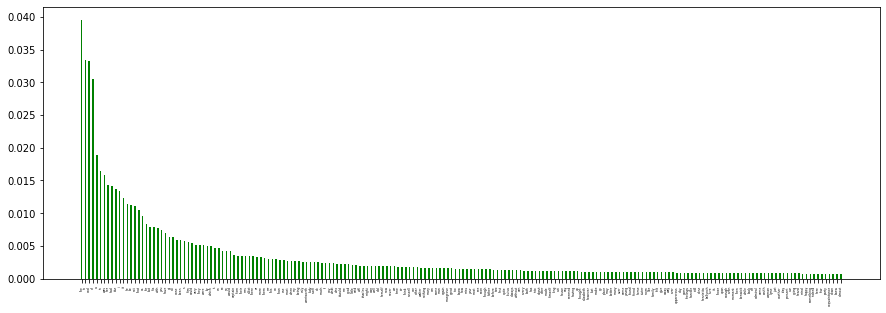

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=4)
plt.bar(my_dict.keys(), my_dict.values(), width=.4, color='g')

## 6. Zipf's law

From Wikipedia:

Zipf's law was originally formulated in terms of quantitative linguistics , stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation. For example, in the Brown Corpus of American English text, the word the is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word of accounts for slightly over 3.5% of words (36,411 occurrences), followed by and (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.[1]

[1](https://en.wikipedia.org/wiki/Zipf%27s_law)

Let's see hpw much our value are off from Zipf's distribution:

In [97]:
wcount=0
for word, count in fdist: 
    if wcount==0:
        fval=count
    else:
        #print(fval,word,count,fval/(wcount+1))
        print(wcount+1,fval/count)
    wcount=wcount+1
    if wcount>199:
        break


2 1.1855413105413106
3 1.1885041056765442
4 1.295330739299611
5 2.0871473354231975
6 2.396688264938805
7 2.4899027673896783
8 2.764950166112957
9 2.8069139966273187
10 2.904886561954625
11 2.961743772241993
12 3.2071290944123314
13 3.4640998959417275
14 3.5042105263157897
15 3.56423982869379
16 3.77437641723356
17 4.11495673671199
18 4.708628005657709
19 5.01355421686747
20 5.051593323216996
21 5.090214067278287
22 5.300955414012739
23 5.65195246179966
24 6.24577861163227
25 6.281132075471698
26 6.698189134808853
27 6.711693548387097
28 6.8639175257731955
29 7.12847965738758
30 7.381374722838138
31 7.670506912442396
32 7.688221709006928
33 7.814553990610329
34 7.964114832535885
35 8.002403846153847
36 8.364321608040202
37 8.406565656565656
38 9.272980501392757
39 9.351123595505618
40 9.377464788732395
41 10.986798679867986
42 11.284745762711864
43 11.361774744027304
44 11.439862542955327
45 11.519031141868512
46 11.63986013986014
47 12.14963503649635
48 12.194139194139193
49 12.3296296

It does not follow original Zipf's law exactly. If it did then we would have 2 2, 3 3, 4 4, etc. But our distribution has Zipf's quality. It decreases exponentially, not linearly.

Let try to calculate S of our Zipf function using code from stackoverflow.[2]

[2](https://stackoverflow.com/questions/43671188/zipf-distribution-how-do-i-measure-zipf-distribution)

In [121]:
import re
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

In [106]:

frequency = {key:value for key,value in my_dict.items()}

In [144]:
s = list(frequency.keys())
s1 = np.array(s)
s1

array(['the', 'to', 'and', 'of', 'a', 'in', 'was', 'her', 'had', 'she',
       'i', 'it', 'he', 'be', 'not', 'that', 'as', 'for', 'but', 'his',
       'with', 'you', 'have', 'at', 'all', 'anne', 'been', 's', 'him',
       'could', 'very', 'they', 'were', 'by', 'which', 'is', 'on', 'so',
       'no', 'would', 'captain', 'from', 'their', 'mrs', 'elliot',
       'there', 'or', 'more', 'them', 'mr', 'this', 'an', 'than', 'one',
       'must', 'when', 'my', 'being', 'only', 'wentworth', 'lady', 'such',
       'do', 'much', 'if', 'any', 'what', 'who', 'should', 'me', 'good',
       'little', 'said', 'will', 'charles', 'might', 'own', 'well', 'did',
       'herself', 'now', 'never', 'we', 'time', 'sir', 'think', 'russell',
       'are', 'other', 'walter', 'nothing', 'mary', 'am', 'some', 'man',
       'again', 'musgrove', 'great', 'too', 'know', 'how', 'miss', 'your',
       'most', 'see', 'soon', 'though', 'father', 'before', 'two',
       'first', 'quite', 'louisa', 'always', 'without', 'ca

In [142]:
a=2
plt.rc('xtick',labelsize=8)


In [143]:
count, bins, ignored = plt.hist(s1[s1<50], 50, cumulative=True)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'int'

array([1.5505461 , 0.38763652, 0.1722829 , 0.09690913, 0.06202184,
       0.04307072, 0.0316438 , 0.02422728, 0.01914254, 0.01550546,
       0.01281443, 0.01076768, 0.00917483, 0.00791095, 0.00689132,
       0.00605682, 0.00536521, 0.00478564, 0.00429514, 0.00387637,
       0.00351598, 0.00320361, 0.00293109, 0.00269192])

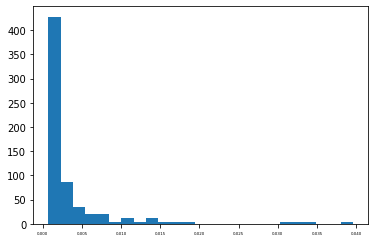

In [128]:
x = np.arange(1., 25.)
y = x**(-a) / special.zetac(a)
x
y

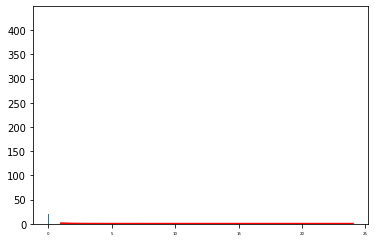

In [126]:
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.show()